Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [3]:
# Code here
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis = 1, inplace = True)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [4]:
# I'll just check the size of the data set.
len(movies_df.index)

4803

In [5]:
# Code here
movies_df.drop_duplicates(keep = 'first', inplace = True)
len(movies_df.index)

4803

It seems that there are no duplicate rows. As a sanity check, I will just inspect the rows with duplicate titles.

In [6]:
movies_df[movies_df.duplicated(subset = ['title'], keep = False)]

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Host,6.0,1817
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Batman,7.0,2096
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",The Host,6.7,537
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203


These are clearly different films with the same title, so that's all right.

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
# Code here
movies_df.drop(movies_df[movies_df.budget == 0].index, inplace = True)
movies_df.drop(movies_df[movies_df.revenue == 0].index, inplace = True)
len(movies_df.index)

3229

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [8]:
# Change the release_date column to DateTime column
# A function that will convert the format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format = '%Y-%m-%d')
movies_df.loc[0, 'release_date']

# Extract the release year from every release date
# I'm not entirely sure what's meant by 'extract' - I'll add a new column to record this information.
movies_df['release_year'] = movies_df['release_date'].dt.year

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [9]:
# code here
movies_df['budget'] = movies_df['budget'].apply(np.int64)

In [10]:
movies_df['revenue'] = movies_df['revenue'].apply(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [11]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
# Code here
# The 5 most expensive movies:
movies_df.sort_values(by = 'budget')[['title', 'budget', 'revenue']].iloc[-5:]

,title,budget,revenue
4,John Carter,260000000,284139100
10,Superman Returns,270000000,391081192
7,Avengers: Age of Ultron,280000000,1405403694
1,Pirates of the Caribbean: At World's End,300000000,961000000
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802


In [13]:
# The five cheapest movies:
movies_df.sort_values(by = 'budget')[['title', 'budget', 'revenue']].iloc[0:5]

,title,budget,revenue
4238,Modern Times,1,8500000
3611,A Farewell to Arms,4,25
3372,Split Second,7,5
3419,Bran Nue Dae,7,7
4608,The Prophecy,8,16


There are some implausible figures here for budget and revenue, so I won't look too hard at the cheapest movies. Instead I'll plot budget against revenue and see where the most expensive movies feature.

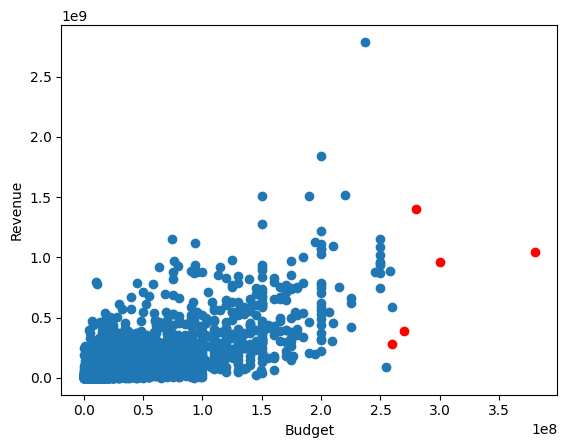

In [14]:
to_plot = movies_df.sort_values(by = 'budget', ascending = False)[['budget', 'revenue']]
most_expensive = to_plot.iloc[:5]
others = to_plot.iloc[5:]
plt.scatter('budget', 'revenue', data = others)
plt.scatter('budget', 'revenue', data = most_expensive, color = 'red')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

Budget is positively associated with revenue, but the most expensive few movies are way more expensive than the others, without a corresponding increase in revenue.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [15]:
# code here
# We add a column to our dataframe for profit and calculate.
movies_df['profit'] = [x - y for x, y in zip(movies_df.revenue, movies_df.budget)]

# The 5 most profitable movies:
movies_df.sort_values(by = 'profit', ascending = False)[['budget', 'revenue', 'title', 'profit']].iloc[:5]

,budget,revenue,title,profit
0,237000000,2787965087,Avatar,2550965087
25,200000000,1845034188,Titanic,1645034188
28,150000000,1513528810,Jurassic World,1363528810
44,190000000,1506249360,Furious 7,1316249360
16,220000000,1519557910,The Avengers,1299557910


In [16]:
# The 5 least profitable movies / biggest bombs:
movies_df.sort_values(by = 'profit')[['budget', 'revenue', 'title', 'profit']].iloc[:5]

,budget,revenue,title,profit
13,255000000,89289910,The Lone Ranger,-165710090
338,145000000,25819961,The Alamo,-119180039
141,150000000,38992758,Mars Needs Moms,-111007242
208,160000000,61698899,The 13th Warrior,-98301101
311,100000000,7103973,The Adventures of Pluto Nash,-92896027


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [17]:
# The 5 most talked-about/popular movies:
movies_df.sort_values(by = 'popularity', ascending = False)[['popularity', 'title']].head(5)

,popularity,title
546,875.581305,Minions
95,724.247784,Interstellar
788,514.569956,Deadpool
94,481.098624,Guardians of the Galaxy
127,434.278564,Mad Max: Fury Road


#### Find Movies which are rated above 7



In [18]:
# Code here
movies_df[['vote_average', 'title']][movies_df['vote_average'] > 7]

,vote_average,title
0,7.2,Avatar
3,7.6,The Dark Knight Rises
6,7.4,Tangled
7,7.3,Avengers: Age of Ultron
8,7.4,Harry Potter and the Half-Blood Prince
...,...,...
4713,7.4,Roger & Me
4724,7.5,Eraserhead
4738,7.1,Pi
4773,7.4,Clerks


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [19]:
# Code here
# I'm going to interpret this question to mean: in which year did we have the highest number of movies that turned a profit?
# First we have to group by year:
profitable_movies = movies_df[['profit', 'release_year']][movies_df['profit'] > 0]
profitable_years = profitable_movies.groupby('release_year').count()
profitable_years.sort_values(by = 'profit', ascending = False).head()

,profit
release_year,
2011,125
2013,123
2010,120
2006,117
2014,111


There were 125 profitable movies released in 2011 which, in the way I understood the question, makes it the year that had the most profitable movies.

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [20]:
# Code here
# It seems that we should split these lists of genres up into their elements, because taken as lists there are too many to be useful.
len(movies_df.genres.unique())

933

In [21]:
# The trouble is that they are not currently formatted as lists, but as strings. So we have to get a list of genres out for each movie.
genres_preformatted = movies_df.genres

# A dictionary to record a count of times a single genre appears.
genre_count = {}

# A loop to extract individual genres.
for genre_list_string in genres_preformatted:
    genre_list_string = genre_list_string.split(', ') # Create a list of strings from the single string.
    for element in genre_list_string:
        to_add = element.strip('[').strip(']').strip("'") # Get just the (sub-)string corresponding to a single genre.
        if to_add in genre_count:
            genre_count[to_add] += 1
        else:
            genre_count[to_add] = 1

genre_count

{'Action': 918,
 'Adventure': 661,
 'Fantasy': 342,
 'Science Fiction': 431,
 'Crime': 521,
 'Drama': 1441,
 'Thriller': 935,
 'Animation': 188,
 'Family': 365,
 'Western': 57,
 'Comedy': 1110,
 'Romance': 574,
 'Horror': 332,
 'Mystery': 265,
 'History': 145,
 'War': 120,
 'Music': 111,
 'Documentary': 38,
 'Foreign': 5,
 '': 1}

In [22]:
# I'm not sure how an empty string stayed in there. Perhaps there were two spaces after a comma at some point. Anyway, we can just get rid of it.
genre_count.pop("")

1

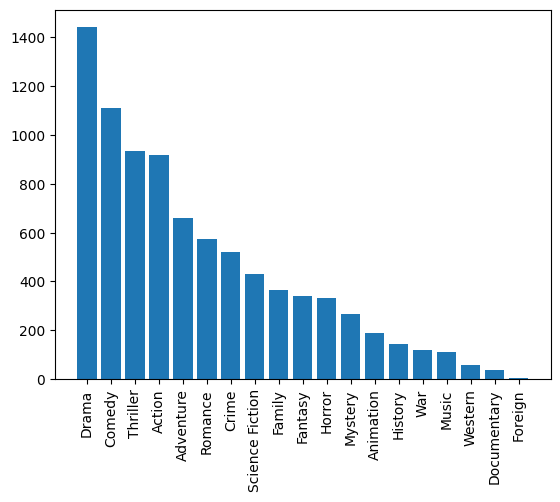

In [23]:
# We can now use this dictionary to plot a bar chart.
genre_df = pd.DataFrame()
genre_df['genre'] = genre_count.keys()
genre_df['movies'] = [genre_count[x] for x in genre_df['genre']]
genre_df.sort_values('movies', ascending = False, inplace = True)
plt.bar('genre', 'movies', data = genre_df)
plt.xticks(rotation = 90)
plt.show()

Drama is the most frequently-appearing genre. Comedy, thriller and action are also quite frequent.

In [24]:
#### Generate three different interesting visualisations with a data story.

Let's explore the association between how much a movie is talked about, which is what 'popularity' measures according to the disucsion above, and how good it is according to voting. In other words:

#### Do people talk more about films they like more?

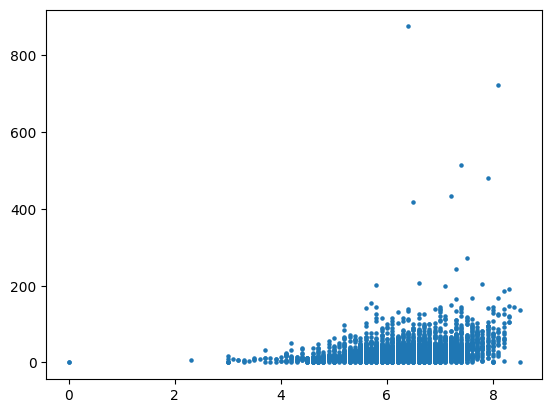

In [25]:
plt.scatter(movies_df.vote_average, movies_df.popularity, s = 5)
plt.show()

There appears to be a slight positive correlation between popularity and average vote. So, generally speaking, the more that people are talking about a film, the more they like it. Now, let's ask the following question:

#### What proportion of the 100 best-rated movies are produced in which different countries?

In [26]:
# To extract the data, we use a similar method that we used for the genre count above.
# Get the 100 best-rated movies.
to_grab = movies_df.sort_values(by = 'vote_average', ascending = False).head(100)

countries_preformatted = to_grab.production_countries

# A dictionary to record a count of times a single country appears.
country_mentions = {}

# A loop to extract individual countries.
for country_list_string in countries_preformatted:
    country_list_string = country_list_string.split(', ') # Create a list of strings from the single string.
    for element in country_list_string:
        to_add = element.strip('[').strip(']').strip("'") # Get just the (sub-)string corresponding to a single country.
        if to_add in country_mentions:
            country_mentions[to_add] += 1 / len(country_list_string) # If a movie has two production countries, they each count for half, etc.
        else:
            country_mentions[to_add] = 1

country_mentions

{'United States of America': 67.08333333333334,
 'Japan': 4.0,
 'Germany': 5.333333333333334,
 'United Kingdom': 11.25,
 'Canada': 2.833333333333333,
 'New Zealand': 2.0,
 'Italy': 1.3333333333333333,
 'Spain': 1.8333333333333333,
 'Brazil': 1,
 'France': 2.25,
 'Ireland': 1,
 'South Korea': 1,
 'Bahamas': 1,
 'Poland': 1,
 'China': 1,
 'Denmark': 1,
 'Sweden': 1,
 'Hong Kong': 1.3333333333333333,
 'Australia': 1,
 'Argentina': 1}

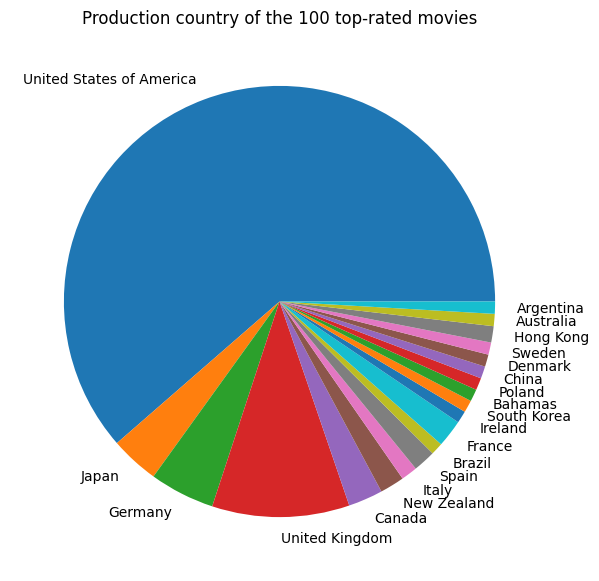

In [27]:
# We can now use this dictionary to plot a pie chart.
country_df = pd.DataFrame()
country_df['country'] = country_mentions.keys()
country_df['movies'] = [country_mentions[x] for x in country_df['country']]
plt.figure(figsize = (10, 7))
plt.pie(country_df['movies'], labels = country_df['country'])
plt.title("Production country of the 100 top-rated movies")
plt.show()

The USA is streets ahead of every other country.

#### Have budgets generally been increasing over time, and if so by how much?

In [28]:
# We group by year, find the average budget of movies that year, then sort by year to get chronological order.
budget_change_df = movies_df[['release_year', 'budget']].groupby('release_year').mean().sort_values(by = 'release_year')
budget_change_df.head(20)

,budget
release_year,
1916,3.859070e+05
1925,2.450000e+05
1927,9.262000e+07
1929,3.790000e+05
1930,3.950000e+06
1932,4.000000e+00
1933,3.195000e+05
1934,3.250000e+05
1935,6.090000e+05


In [29]:
# There are some gaps and some silly numbers in the early years, so we'll start in 1940.
budget_change_df = budget_change_df.loc[1940:,:]

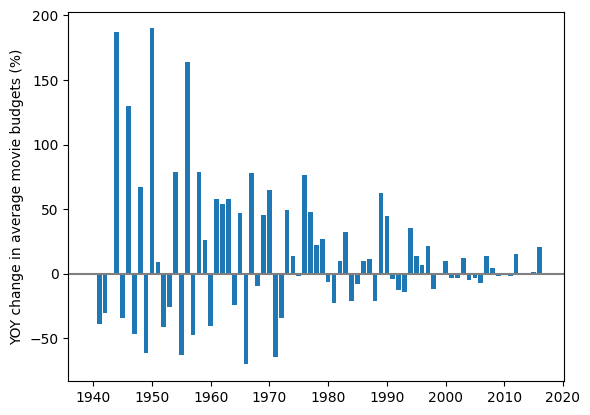

In [30]:
# Now we need a list we can turn into a column where we enter the % change from before.

yoy_change = [0]
budget_means = list(budget_change_df['budget'])

for index in range(1, len(budget_means)):
    percent = ((budget_means[index] - budget_means[index - 1]) / budget_means[index - 1]) * 100 # % change from one year to the next
    yoy_change.append(percent)

budget_change_df['change_pct'] = yoy_change

# Plot
plt.bar(budget_change_df.index, budget_change_df.change_pct)
plt.axhline(0, color = 'grey')
plt.ylabel("YOY change in average movie budgets (%)")
plt.show()

We can tell that budgets have generally been increasing substantially, as most years the bar goes well above zero.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

Please see the file 'automobile_EDA_compulsory_task2.pdf'.